<div style="text-align:center">
    <h1>
        SARSA
    </h1>
</div>

<br><br>

<div style="text-align:center">
    In this notebook we are going to implement a method that learns from experience and uses bootstrapping.
    It is known as SARSA because of the elements involved in the update rule:
</div>

\begin{equation}
\text{State}_t, \text{Action}_t, \text{Reward}_t, \text{State}_{t+1}, \text{Action}_{t+1}
\end{equation}

<br>

<div style="text-align:center">
    This method follows an on-policy strategy, in which the same policy that is optimized is responsible for scanning the environment.
</div>


<br>

## Import the necessary software libraries:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from envs import Maze
from utils import plot_policy, plot_action_values, test_agent

/usr/local/lib/python3.11/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

## Create the environment, value table and policy

#### Create the environment

In [ ]:
env = Maze()

#### Create the $Q(s, a)$ table

In [ ]:
action_values = np.zeros(shape=(5, 5, 4))

#### Create the policy $\pi(s)$

In [ ]:
def policy(state, epsilon=0.):
    if np.random.random() < epsilon:
        return np.random.randint(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

#### Plot the value table $Q(s,a)$

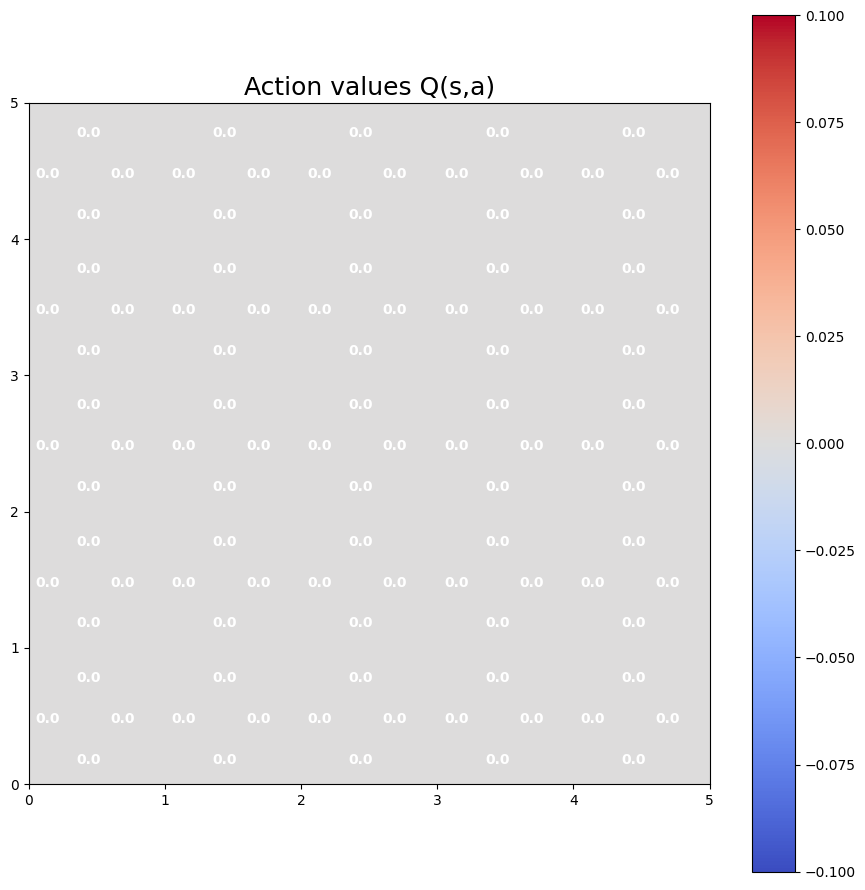

In [ ]:
plot_action_values(action_values)

#### Plot the policy

/usr/local/lib/python3.11/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


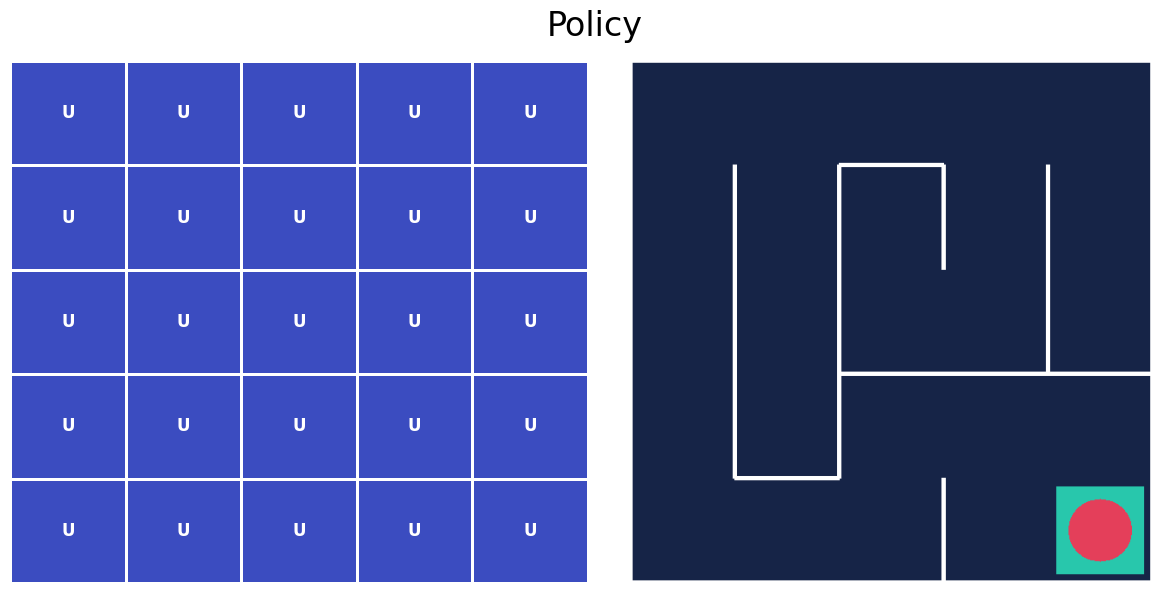

In [ ]:
plot_policy(action_values, env.render(mode='rgb_array'))

## Implement the algorithm


In [ ]:
def sarsa(action_values, policy, episodes, alpha=0.1, gamma=0.99, epsilon=0.2):

    for episode in range(1, episodes + 1):
        state = env.reset()
        action = policy(state, epsilon)
        done = False
        while not done:
            next_state, reward, done, _ = env.step(action)
            next_action = policy(next_state, epsilon)

            qsa = action_values[state][action]
            next_qsa = action_values[next_state][next_action]
            action_values[state][action] = qsa + alpha * (reward + gamma * next_qsa - qsa)
            state = next_state
            action = next_action

In [ ]:
sarsa(action_values, policy, 1000)

## Show results

#### Show resulting value table $Q(s,a)$

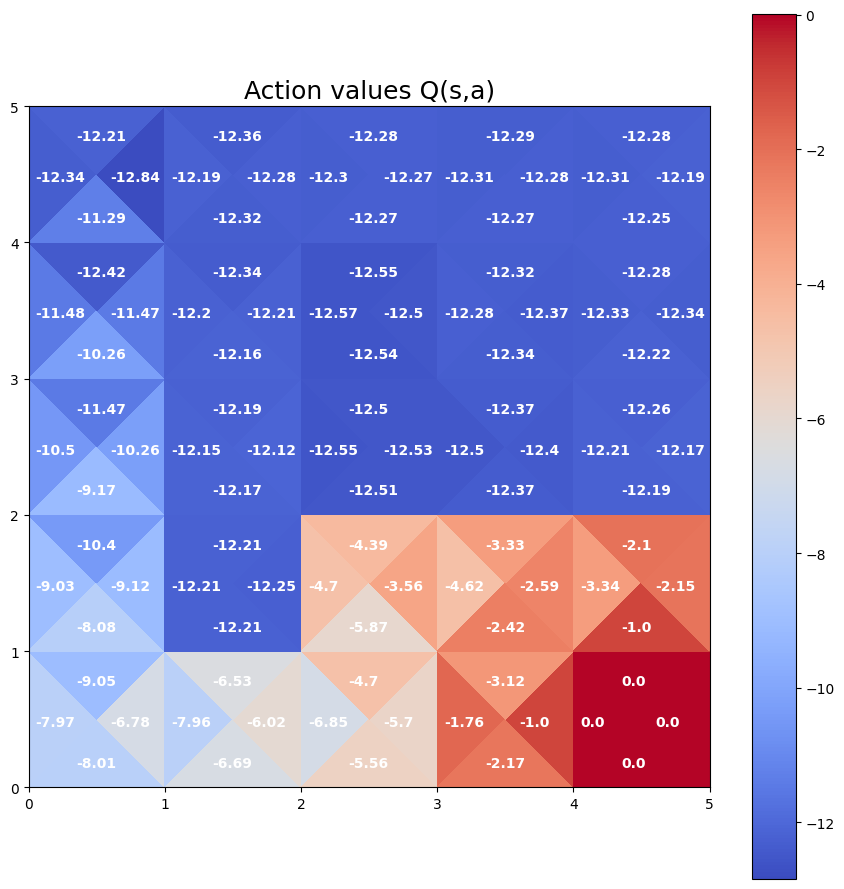

In [ ]:
plot_action_values(action_values)

#### Show resulting policy $\pi(\cdot|s)$

/usr/local/lib/python3.11/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


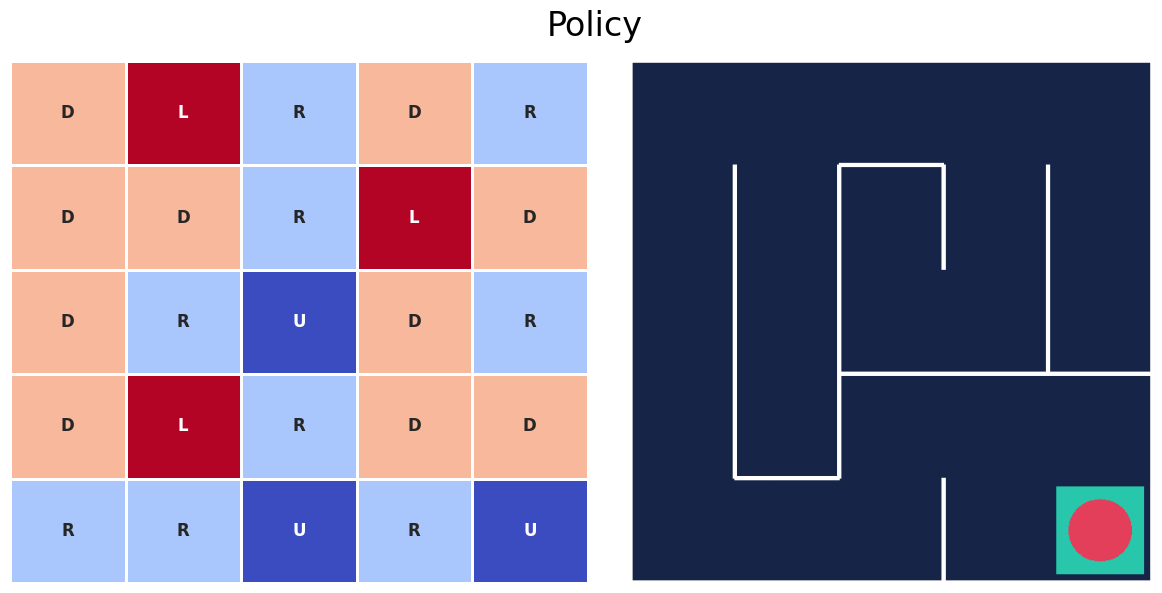

In [ ]:
plot_policy(action_values, env.render(mode='rgb_array'))

#### Test the resulting agent

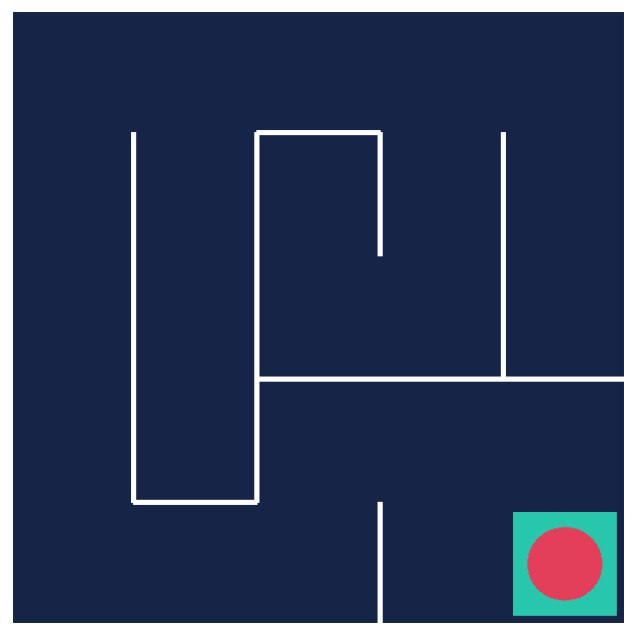

In [ ]:
test_agent(env, policy,episodes=5)

## Resources

[[1] Reinforcement Learning: An Introduction. Ch. 6: Temporal difference learning](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf)